<a href="https://colab.research.google.com/github/Praful22/CasadiPlayground/blob/main/CasADi_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CasADi Notebook: Example and Tutorials Developed to learn and work for Coordinated Control of Aerial Vehicle.

CasADi is a software tool for numerical optimization focusing on optimal control problems.

*   Creators: Joel Andersson, Joris Gillis, Moritz Diehl



This document is a colloborative notebook in the form of bullet points, tutorials, and shareable-knowledge that Pratik Gyawali and Praful Sigdel noted during their work for Aerial Vehicle Coordinated Control.

After going throught this notebook, one should be able to formulate and manipulate expressions in CasADi’s symbolic framework, generate derivative information efficiently using algorithmic differentiation, to set up, solve and perform forward and adjoint sensitivity analysis for systems of ordinary differential equations (ODE) or differential-algebraic equations (DAE) as well as to formulate and solve nonlinear programs (NLP) problems and optimal control problems (OCP).[1]
---
1.   Programming Languages Availibility:
*   Python (Best Documented) --> This is what we have chosen to work with.
*   C++ (Limited Documentation)
*   Matlab/Octave

Par Performance among all three programming languages.

2. What is CasADi and What it is not? [1]
* Tool for Algorithmic Differentiation using syntax borrowed from Computer Algebra Systems (CAS).
* Core functionalities of the Tool:
  * Algorithmic Differentiation
  * Support for Ordinary Differential Equations (ODE) / Differential-Algebraic Equations(DAE) integration
  * Sensitivity Analysis
  * Nonlinear programming
  * Interfaces to other numerical tools.

3. Usable only through the implementation or reimplementation of models in CasADi syntax.

4. CasADi provides the user with a set of “building blocks” that can be used to implement general- purpose or specific-purpose OCP solvers efficiently with a modest programming effort. Not an "optimal control problem solver" that allows the user to enter an OCP and then gives the solution back.

5. Installation Instructions: http://install.casadi.org/

# Symbolic Framework


*   Self-contained symbolic framework that allows users to create symbolic experessions using everything-is-a-matrix syntax i.e. vectors are treated as n-by-1 matrices and scalars as 1-by-1 matrix.
*   All matrices are sparse and use a **general sparse format - [compressed column storage (CCS)](https://en.wikipedia.org/wiki/Sparse_matrix#:~:text=Compressed%20sparse%20column%20(CSC%20or%20CCS))** - to store matrices.



Install Casadi!

In [ ]:
pip install casadi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 MB 13.3 MB/s eta 0:00:00


The SX data type is used to represent matrices whose elements consist of symbolic expressions made up by a sequence of unary and binary operations. One can import the symbols into the workspace as follows:

In [ ]:
from casadi import *

Create a variable *x* using below syntax :

In [ ]:
x = MX.sym("x")
x

MX(x)

This creates a 1-by-1 matrix, i.e. a scalar containing a symbolic primitive called x. This is just the display name, not the identifier. Multiple variables can have the same name, but still be different. The identifier is the return value. You can also create vector- or matrix-valued symbolic variables by supplying additional arguments to SX.sym:

In [ ]:
x = SX.sym('y',3)
Z = SX.sym('Z',5,2)
print(x)
print(Z)

[y_0, y_1, y_2]

[[Z_0, Z_5], 
 [Z_1, Z_6], 
 [Z_2, Z_7], 
 [Z_3, Z_8], 
 [Z_4, Z_9]]


which creates a 3-by-1 matrix, i.e. a vector, and a 5-by-2 matrix with symbolic primitives, respectively.

SX.sym is a (static) function which returns an SX instance. When variables have been declared, expressions can now be formed in an intuitive way:

In [ ]:
x = SX.sym('x') # Declaration
f = x**3 + 10 # Expression
f = sqrt(f)
print(f)

sqrt(((x*sq(x))+10))


Create constant SX instances without any symbolics primitives as follows:

In [ ]:
A1 = SX.zeros(3,3)
A2 = SX(4,5)
A3 = SX.eye(4)
print(A1, A2, A3)

@1=0, 
[[@1, @1, @1], 
 [@1, @1, @1], 
 [@1, @1, @1]] 
[[00, 00, 00, 00, 00], 
 [00, 00, 00, 00, 00], 
 [00, 00, 00, 00, 00], 
 [00, 00, 00, 00, 00]] @1=1, 
[[@1, 00, 00, 00], 
 [00, @1, 00, 00], 
 [00, 00, @1, 00], 
 [00, 00, 00, @1]]


The following list summarizes the most commonly used ways of constructing new SX expressions:
*  SX.sym(name,n,m): Create an 𝑛-by-𝑚 symbolic primitive
*  SX.zeros(n,m): Create an 𝑛-by-𝑚 dense matrix with all zeros
*  SX(n,m): Create an 𝑛-by-𝑚 sparse matrix with all structural zeros
*  SX.ones(n,m): Create an 𝑛-by-𝑚 dense matrix with all ones
* SX.eye(n): Create an 𝑛-by-𝑛 diagonal matrix with ones on the diagonal and structural zeros elsewhere.
* SX(scalar_type): Create a scalar (1-by-1 matrix) with value given by the argument. This method can be used explicitly, e.g. SX(9), or implicitly, e.g. 9 * SX.ones(2,2).
* SX(matrix_type): Create a matrix given a numerical matrix given as a NumPy or SciPy matrix (in Python) or as a dense or sparse matrix (in MATLAB/Octave). In MATLAB/Octave e.g. SX([1,2,3,4]) for a row vector, SX([1;2;3;4]) for a column vector and SX([1,2;3,4]) for a 2-by-2 matrix. This method can be used explicitly or implicitly.
* repmat(v,n,m): Repeat expression 𝑣 𝑛 times vertically and 𝑚 times horizontally. repmat(SX(3),2,1) will create a 2-by-1 matrix with all elements 3.
* (Python only) SX(list): Create a column vector (𝑛-by-1 matrix) with the elements in the list, e.g. SX([1,2,3, 4]) (note the difference between Python lists and MATLAB/Octave horizontal concatenation, which both uses square bracket syntax)
*(Python only) SX(list of list): Create a dense matrix with the elements in the lists, e.g. SX([[1,2],[3, 4]]) or a row vector (1-by-𝑛 matrix) using SX([[1,2,3,4]]).

MX Symbolics:

* More general matrix expression type MX than SX.
* The MX type allows to build up expression consisting of a sequence of elementary operations.
* Unlike SX, the elementary operations aren't limited to scalar unary and binary operations $(R → R$ or $R × R → R)$. The elemantary operations are general multiple sparse-matrix valued input and multiple sparse-matrix valued output. $R^{𝑛_1×𝑚_1} × . . .×R^{𝑛_𝑁×𝑚_𝑁} → R^{𝑝_1×𝑞_1} ×...×R^{𝑝_𝑀×𝑞_𝑀}$
* The syntax of MX mirrors that of SX:



In [ ]:
x = MX.sym('x',2,2)
y = MX.sym('y')
f = 3*x + y
print(f)
print(f.shape)

((3*x)+y)
(2, 2)




*   Functionality of setting and getting elements in MX is similar to Python.


## Mixing SX and MX

* Cannot multiply SX object with and MX object, or perform any other operation to mix the two in the same expression graph.
* Can include calls to Functions defined by the SX expressions in MX graph.
* Mixing SX and MX is often a good idea since functions defined by SX expressions have a much lower overhead per operation making it much faster for operations that are naturally written as a sequence of scalar operations.
* The SX expressions are thus intended to be used for low level operations (for example DAE formulations), whereas the MX expressions act as a glue and enables the formulation of e.g. the constraint function of an NLP.




Now that a brief fundamental of CasADi has been introduced. Let's dive into formulation of as many examples and tutorials as possible until the muscles of our memory are grown enough to actually formulate and solve complex problems relating to Coordinated Control of Aerial Vehicles.

# Classic Double Pendulum On a Cart Problem
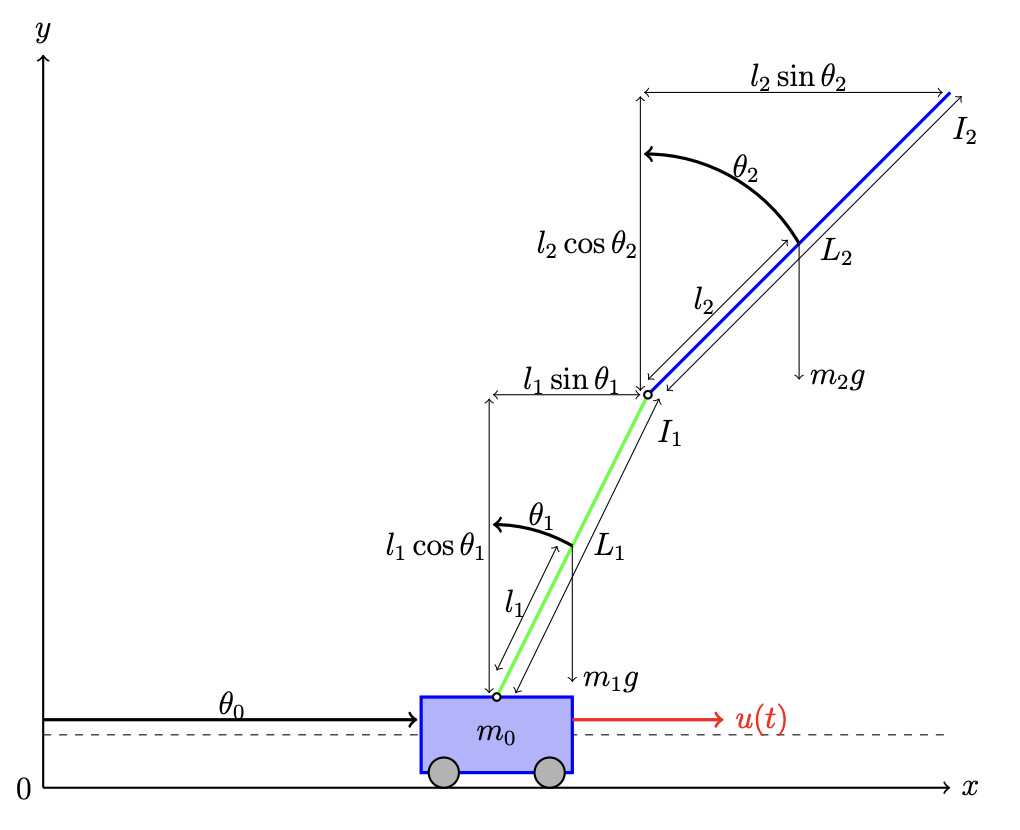


The position of the cart one is:

\begin{aligned}
& x_{0} = θ_{0}\\
& y_{0} = 0
\end{aligned}

The position of the midpoint of the first pendulum link is given by:

\begin{aligned}
& x_{1} = θ_{0} + l_{1} sinθ_{1} \\
& y_{1} = l_{1} cosθ_{1}
\end{aligned}

The position of the midpoint of the second pendulum link is given by:

\begin{aligned}
& x_{2} = θ_{0} + L_{1}sinθ_{1} + l_{2}sinθ_{2} \\
& y_{2} = L_{1}cosθ_{1} + l_{2}cosθ_{2}
\end{aligned}

Lagrangian Formulation of Double Pendulum on a Cart problem:


\begin{aligned} \frac{d}{d t}\left(\frac{\partial L}{\partial \dot{\boldsymbol{\theta}}}\right)-\frac{\partial L}{\partial \boldsymbol{\theta}}=\mathbf{q}
\end{aligned}

Here **L** is the lagrangian, **q** is a vector of generalized forces which act in direction of each component in $\theta$, these forces are not included in the kinetic and potential energies of the cart and each pendulum link.


Here,


\begin{aligned}
\mathbf{\theta} =
\begin{pmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2}
\end{pmatrix}
\end{aligned}


The control force $u(t)$ is one of these forces which acts horizontally only on the cart and doesn't affect angles directly.
Ignoring other external forces, **q** is given as

\begin{aligned}
\mathbf{q} =
\begin{pmatrix}
u(t) \\
0\\
0
\end{pmatrix} =
\begin{pmatrix}
1 \\
0\\
0
\end{pmatrix} u(t) = \mathbf{H} u(t)
\end{aligned}

\begin{aligned}
& \frac{d}{d t}\left(\frac{\partial L}{\partial \dot{\theta}_0}\right)-\frac{\partial L}{\partial \theta_0}=u(t) \\
& \frac{d}{d t}\left(\frac{\partial L}{\partial \dot{\theta}_1}\right)-\frac{\partial L}{\partial \theta_1}=0 \\
& \frac{d}{d t}\left(\frac{\partial L}{\partial \dot{\theta}_2}\right)-\frac{\partial L}{\partial \theta_2}=0
\end{aligned}

Lagrange Equations Steps:

❖ T : Total Kinetic Energy of the System :

\begin{aligned}
& T = E_{kin} = E_{kin}^{(0)} + E_{kin}^{(1)} + E_{kin}^{(2)} \\
\end{aligned}

$E_{kin}^{(0)}$ = Kinetic energy of the cart

$E_{kin}^{(1)}$ = Kinetic energy of the first pendulum

$E_{kin}^{(2)}$ = Kinetic energy of the second pendulum



❖ V : Total Potential Energy of the System :

\begin{aligned}& V = E_{pot} = E_{pot}^{(0)} + E_{pot}^{(1)} + E_{pot}^{(2)}\end{aligned}

$ E_{pot}^{(0)} =$ Potential Energy of the cart

$ E_{pot}^{(1)} =$ Potential Energy of the first pendulum

$ E_{pot}^{(2)} =$ Potential Energy of the second pendulum

❖ Lagrange's Equations:
\begin{aligned}& L = T - V \end{aligned}

$$
\begin{aligned}
E_{k i n}= & E_{k i n}^{(0)}+E_{k i n}^{(1)}+E_{k i n}^{(2)} \\
= & \frac{1}{2} m_0 \dot{\theta}_0^2+\frac{1}{2} m_1 \dot{\theta}_0^2+\frac{1}{2}\left(m_1 l_1^2+I_1\right) \dot{\theta}_1^2+m_1 l_1 \dot{\theta}_0 \dot{\theta}_1 \cos \theta_1 \\
& +\frac{1}{2} m_2 \dot{\theta}_0^2+\frac{1}{2} m_2 L_1^2 \dot{\theta}_1^2+\frac{1}{2}\left(m_2 l_2^2+I_2\right) \dot{\theta}_2^2+m_2 L_1 \dot{\theta}_0 \dot{\theta}_1 \cos \theta_1 \\
& +m_2 l_2 \dot{\theta}_0 \dot{\theta}_2 \cos \theta_2+m_2 L_1 l_2 \dot{\theta}_1 \dot{\theta}_2 \cos \left(\theta_1-\theta_2\right) \\
= & \frac{1}{2}\left(m_0+m_1+m_2\right) \dot{\theta}_0^2+\frac{1}{2}\left(m_1 l_1^2+m_2 L_1^2+I_1\right) \dot{\theta}_1^2+\frac{1}{2}\left(m_2 l_2^2+I_2\right) \dot{\theta}_1^2 \\
& +\left(m_1 l_1+m_2 L_1\right) \dot{\theta}_0 \dot{\theta}_1 \cos \theta_1+m_2 l_2 \dot{\theta}_0 \dot{\theta}_2 \cos \theta_2+m_2 L_1 l_2 \dot{\theta}_1 \dot{\theta}_2 \cos \left(\theta_1-\theta_2\right)
\end{aligned}
$$
Also
$$
\begin{aligned}
E_{\text {pot }} & =E_{\text {pot }}^{(0)}+E_{\text {pot }}^{(1)}+E_{\text {pot }}^{(2)} \\
& =0+m_1 g l_1 \cos \theta_1+m_1 g\left(L_1 \cos \theta_1+l_2 \cos \theta_2\right) \\
& =g\left(m_1 l_1+m_2 L_1\right) \cos \theta_1+m_2 g l_2 \cos \theta_2
\end{aligned}
$$
The Lagrangian is
$$
\begin{aligned}
L= & E_{k i n}-E_{\text {pot }} \\
= & \frac{1}{2}\left(m_0+m_1+m_2\right) \dot{\theta}_0^2+\frac{1}{2}\left(m_1 l_1^2+m_2 L_1^2+I_1\right) \dot{\theta}_1^2+\frac{1}{2}\left(m_2 l_2^2+I_2\right) \dot{\theta}_2^2 \\
& +\left(m_1 l_1+m_2 L_1\right) \cos \theta_1 \dot{\theta}_0 \dot{\theta}_1+m_2 l_2 \cos \theta_2 \dot{\theta}_0 \dot{\theta}_2+m_2 L_1 l_2 \cos \left(\theta_1-\theta_2\right) \dot{\theta}_1 \dot{\theta}_2 \\
& -g\left(m_1 l_1+m_2 L_1\right) \cos \theta_1-m_2 g l_2 \cos \theta_2
\end{aligned}
$$
Now that the Lagrangian is known, explicitly calculating the partial, and full derivatives for the system of equations we get the following final form:
\begin{aligned}
&\left(m_0+m_1+m_2\right) \ddot{\theta}_0+\left(m_1 l_1+m_2 L_1\right) \cos \theta_1 \ddot{\theta}_1+m_2 l_2 \cos \theta_2 \ddot{\theta}_2 -\left(m_1 l_1+m_2 L_1\right) \sin \theta_1 \dot{\theta}_1^2-m_2 l_2 \sin \theta_2 \dot{\theta}_2^2=u(t).....(1) \\
&\left(m_1 l_1^2+m_2 L_1^2+I_1\right) \ddot{\theta}_1+\left(m_1 l_1+m_2 L_1\right) \cos \theta_1 \ddot{\theta}_0 + m_2 L_1 l_2 \cos \left(\theta_1-\theta_2\right) \ddot{\theta}_2+m_2 L_1 l_2 \sin \left(\theta_1-\theta_2\right) \dot{\theta}_2^2 - g\left(m_1 l_1+m_2 L_1\right) \sin \theta_1=0 .....(2)\\
& m_2 l_2 \cos \theta_2 \ddot{\theta}_0+m_2 L_1 l_2 \cos \left(\theta_1-\theta_2\right) \ddot{\theta}_1+\left(m_2 l_2^2+I_2\right) \ddot{\theta}_2 - m_2 L_1 l_2 \sin \left(\theta_1-\theta_2\right) \dot{\theta}_1^2-m_2 g l_2 \sin \theta_2=0 ....(3)
\end{aligned}

Equations (1,2,3) can be written as nonlinear second-order system of form:

$$
\mathbf{D}(\boldsymbol{\theta}) \ddot{\boldsymbol{\theta}}+\mathbf{C}(\boldsymbol{\theta}, \dot{\boldsymbol{\theta}}) \dot{\boldsymbol{\theta}}+\mathbf{G}(\boldsymbol{\theta})=\mathbf{H} u ....(4)
$$
where
$$
\begin{aligned}
\mathbf{D}(\boldsymbol{\theta}) & =\left[\begin{array}{ccc}
m_0+m_1+m_2 & \left(m_1 l_1+m_2 L_1\right) \cos \theta_1 & m_2 l_2 \cos \theta_2 \\
\left(m_1 l_1+m_2 L_1\right) \cos \theta_1 & m_1 l_1^2+m_2 L_1^2+I_1 & m_2 L_1 l_2 \cos \left(\theta_1-\theta_2\right) \\
m_2 l_2 \cos \theta_2 & m_2 L_1 l_2 \cos \left(\theta_1-\theta_2\right) & m_2 l_2^2+I_2
\end{array}\right] \\
\mathbf{C}(\boldsymbol{\theta}, \dot{\boldsymbol{\theta}}) & =\left[\begin{array}{ccc}
0 & -\left(m_1 l_1+m_2 L_1\right) \sin \theta_1 \dot{\theta}_1 & -m_2 l_2 \sin \theta_2 \dot{\theta}_2 \\
0 & 0 & m_2 L_1 l_2 \sin \left(\theta_1-\theta_2\right) \dot{\theta}_2 \\
0 & -m_2 L_1 l_2 \sin \left(\theta_1-\theta_2\right) \dot{\theta}_1 & 0
\end{array}\right] \\
\mathbf{G}(\boldsymbol{\theta}) & =\left[\begin{array}{c}
0 \\
-\left(m_1 l_1+m_2 L_1\right) g \sin \theta_1 \\
-m_2 g l_2 \sin \theta_2
\end{array}\right] \\
\mathbf{H} & =\left[\begin{array}{l}
1 \\
0 \\
0
\end{array}\right]
\end{aligned}
$$

Equation (4) can be rewritten with a few simplication and trick as follows:
$$
\ddot{\boldsymbol{\theta}}=-\mathbf{D}^{-1} \mathbf{C} \dot{\boldsymbol{\theta}}-\mathbf{D}^{-1} \mathbf{G}+\mathbf{D}^{-1} \mathbf{H} u
$$
which is
$$
\begin{aligned}
& {\left[\begin{array}{ll}
0 & 0 \\
0 & I
\end{array}\right]\left[\begin{array}{l}
\dot{\boldsymbol{\theta}} \\
\ddot{\boldsymbol{\theta}}
\end{array}\right]=\left[\begin{array}{cc}
0 & 0 \\
0 & -\mathbf{D}^{-1} \mathbf{C}
\end{array}\right]\left[\begin{array}{l}
\boldsymbol{\theta} \\
\dot{\boldsymbol{\theta}}
\end{array}\right]+\left[\begin{array}{c}
0 \\
-\mathbf{D}^{-1} \mathbf{G}
\end{array}\right]+\left[\begin{array}{c}
0 \\
\mathbf{D}^{-1} \mathbf{H}
\end{array}\right] u } \\
& {\left[\begin{array}{ll}
I & 0 \\
0 & I
\end{array}\right]\left[\begin{array}{l}
\dot{\boldsymbol{\theta}} \\
\ddot{\boldsymbol{\theta}}
\end{array}\right]-\left[\begin{array}{ll}
I & 0 \\
0 & 0
\end{array}\right]\left[\begin{array}{l}
\dot{\boldsymbol{\theta}} \\
\ddot{\boldsymbol{\theta}}
\end{array}\right]=\left[\begin{array}{cc}
0 & 0 \\
0 & -\mathbf{D}^{-1} \mathbf{C}
\end{array}\right]\left[\begin{array}{l}
\boldsymbol{\theta} \\
\dot{\boldsymbol{\theta}}
\end{array}\right]+\left[\begin{array}{c}
0 \\
-\mathbf{D}^{-1} \mathbf{G}
\end{array}\right]+\left[\begin{array}{c}
0 \\
\mathbf{D}^{-1} \mathbf{H}
\end{array}\right] u } \\
& {\left[\begin{array}{ll}
I & 0 \\
0 & I
\end{array}\right]\left[\begin{array}{l}
\dot{\boldsymbol{\theta}} \\
\ddot{\boldsymbol{\theta}}
\end{array}\right]-\left[\begin{array}{ll}
0 & I \\
0 & 0
\end{array}\right]\left[\begin{array}{l}
\boldsymbol{\theta} \\
\dot{\boldsymbol{\theta}}
\end{array}\right]=\left[\begin{array}{cc}
0 & 0 \\
0 & -\mathbf{D}^{-1} \mathbf{C}
\end{array}\right]\left[\begin{array}{l}
\boldsymbol{\theta} \\
\dot{\boldsymbol{\theta}}
\end{array}\right]+\left[\begin{array}{c}
0 \\
-\mathbf{D}^{-1} \mathbf{G}
\end{array}\right]+\left[\begin{array}{c}
0 \\
\mathbf{D}^{-1} \mathbf{H}
\end{array}\right] u } \\
& {\left[\begin{array}{ll}
I & 0 \\
0 & I
\end{array}\right]\left[\begin{array}{l}
\dot{\boldsymbol{\theta}} \\
\ddot{\boldsymbol{\theta}}
\end{array}\right]=\left[\begin{array}{cc}
0 & I \\
0 & -\mathbf{D}^{-1} \mathbf{C}
\end{array}\right]\left[\begin{array}{l}
\boldsymbol{\theta} \\
\dot{\boldsymbol{\theta}}
\end{array}\right]+\left[\begin{array}{c}
0 \\
-\mathbf{D}^{-1} \mathbf{G}
\end{array}\right]+\left[\begin{array}{c}
0 \\
\mathbf{D}^{-1} \mathbf{H}
\end{array}\right] u }
\end{aligned}
$$
Let $\mathbf{x}=\left[\begin{array}{c}\boldsymbol{\theta} \\ \dot{\boldsymbol{\theta}}\end{array}\right], \quad \dot{\mathbf{x}}=\left[\begin{array}{l}\dot{\boldsymbol{\theta}} \\ \ddot{\boldsymbol{\theta}}\end{array}\right]$
$$
\begin{aligned}
{\left[\begin{array}{ll}
I & 0 \\
0 & I
\end{array}\right] \dot{\mathbf{x}} } & =\left[\begin{array}{cc}
0 & I \\
0 & -\mathbf{D}^{-1} \mathbf{C}
\end{array}\right] \mathbf{x}+\left[\begin{array}{c}
0 \\
-\mathbf{D}^{-1} \mathbf{G}
\end{array}\right]+\left[\begin{array}{c}
0 \\
\mathbf{D}^{-1} \mathbf{H}
\end{array}\right] u \\
\dot{\mathbf{x}} & =\left[\begin{array}{cc}
0 & I \\
0 & -\mathbf{D}^{-1} \mathbf{C}
\end{array}\right] \mathbf{x}+\left[\begin{array}{c}
0 \\
-\mathbf{D}^{-1} \mathbf{G}
\end{array}\right]+\left[\begin{array}{c}
0 \\
\mathbf{D}^{-1} \mathbf{H}
\end{array}\right] u
\end{aligned}
$$
gives the first-order system
$$
\dot{\mathbf{x}}=\mathbf{A}(\mathbf{x}) \mathbf{x}+\mathbf{B}(\mathbf{x}) u+\mathbf{L}(\mathbf{x})
$$
where
$$
\mathbf{A}(\mathbf{x})=\left[\begin{array}{cc}
0 & I \\
0 & -\mathbf{D}^{-1} \mathbf{C}
\end{array}\right], \quad \mathbf{B}(\mathbf{x})=\left[\begin{array}{c}
0 \\
\mathbf{D}^{-1} \mathbf{H}
\end{array}\right], \quad \mathbf{L}(\mathbf{x})=\left[\begin{array}{c}
0 \\
-\mathbf{D}^{-1} \mathbf{G}
\end{array}\right]
$$
